# Testing New Data Here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.cluster import KMeans

import prepare as p
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from scipy.stats import f_oneway
from scipy import stats

In [2]:
df = p.anna_prep()

In [3]:
df.dtypes

crash_date                   datetime64[ns]
crash_id                              int64
crash_latitude                      float64
crash_longitude                     float64
crash_occupant_count                  int64
crash_vehicle_count                   int64
damage_airbag                         int64
damage_burned                         int64
damage_concentrated                   int64
damage_distributed                    int64
damage_rollover                       int64
damage_zone                           int64
dl_cdl                                int64
dl_class_a                            int64
dl_class_b                            int64
dl_class_m                            int64
dl_state                             object
dl_unlicensed                         int64
driver_age                            int64
driver_male                           int64
driver_race                          object
factors_road                         object
factors_spd_lmt_mph             

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=19, stratify=df.injury_class)

In [5]:
train.shape, test.shape

((10864, 44), (2717, 44))

In [6]:
def split_X_y(train, test, target):
    '''
    Splits train, and test into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 2 dataframes and 2 series:
    X_train (df) & y_train (series), X_test & y_test. 
    '''

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]
    
    return X_train, y_train, X_test, y_test

In [7]:
X_train, y_train, X_test, y_test = split_X_y(train, test, 'injury_class')

In [8]:
X_train

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_color,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury
15555,2021-05-04 04:31:00,18243165,29.489404,-98.569362,2,2,1,0,0,0,...,white,1FMC*********1886,ford,1,mpv,2010,04:31:00,4,Tuesday,1
3400,2021-02-27 19:14:00,18127113,29.466576,-98.646928,2,2,1,0,0,1,...,gold,JS3T*********2248,other,1,mpv,2007,19:14:00,19,Saturday,1
369,2021-03-15 13:38:00,18150264,29.503695,-98.574382,2,2,1,0,0,0,...,gray,2T3Y*********1140,toyota,1,mpv,2017,13:38:00,13,Monday,1
16947,2021-04-28 13:20:00,18258240,29.516970,-98.491711,2,2,0,0,0,0,...,silver,1FMC*********5926,ford,1,mpv,2010,13:20:00,13,Wednesday,1
13757,2021-05-11 08:04:00,18250485,29.473068,-98.405359,2,2,1,0,0,1,...,red,1FMC*********3717,ford,1,mpv,2008,08:04:00,8,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,2021-04-08 18:30:00,18193236,29.520381,-98.460967,4,2,1,0,0,0,...,black,1G1Y*********1822,chevrolet,2,car,2021,18:30:00,18,Thursday,1
3684,2021-02-26 14:34:00,18141106,29.482450,-98.599670,3,3,0,0,0,1,...,black,JTEB*********0797,toyota,1,mpv,2017,14:34:00,14,Friday,0
722,2021-03-13 11:50:00,18148551,29.517639,-98.466878,3,2,1,0,0,1,...,white,KL7C*********8686,chevrolet,1,mpv,2019,11:50:00,11,Saturday,0
3838,2021-02-25 16:19:00,18125183,29.388113,-98.512016,4,3,0,0,0,0,...,blue,4F2C*********2162,mazda,1,mpv,2011,16:19:00,16,Thursday,0


In [9]:
def scale_data(train, test, scale_type = None, to_scale = None):
    '''
    returns scaled data of specified type into data frame, will
    '''
    train_copy = train.copy()
    test_copy = test.copy()
    
    if to_scale == None:
        return train_copy, test_copy
    
    else:
        X_train = train_copy[to_scale]
        X_test = test_copy[to_scale]
        
        
        min_max_scaler = MinMaxScaler()
        robust_scaler = RobustScaler()
        standard_scaler = StandardScaler()
        
        min_max_scaler.fit(X_train)
        robust_scaler.fit(X_train)
        standard_scaler.fit(X_train)
    
        mmX_train_scaled = min_max_scaler.transform(X_train)
        rX_train_scaled = robust_scaler.transform(X_train)
        sX_train_scaled = standard_scaler.transform(X_train)
    
    
        mmX_test_scaled = min_max_scaler.transform(X_test)
        rX_test_scaled = robust_scaler.transform(X_test)
        sX_test_scaled = standard_scaler.transform(X_test)
    
    
        mmX_train_scaled = pd.DataFrame(mmX_train_scaled, columns=X_train.columns)
        mmX_test_scaled = pd.DataFrame(mmX_test_scaled, columns=X_test.columns)

        rX_train_scaled = pd.DataFrame(rX_train_scaled, columns=X_train.columns)
        rX_test_scaled = pd.DataFrame(rX_test_scaled, columns=X_test.columns)


        sX_train_scaled = pd.DataFrame(sX_train_scaled, columns=X_train.columns)
        sX_test_scaled = pd.DataFrame(sX_test_scaled, columns=X_test.columns)
    
    
    if scale_type == 'MinMax':
        for i in mmX_train_scaled:
            train_copy[i] = mmX_train_scaled[i].values
            test_copy[i] = mmX_test_scaled[i].values
    elif scale_type == 'Robust':
        for i in rX_train_scaled:
            train_copy[i] = rX_train_scaled[i].values
            test_copy[i] = rX_test_scaled[i].values
    elif scale_type == 'Standard':
          for i in sX_train_scaled:
            train_copy[i] = sX_train_scaled[i].values
            test_copy[i] = sX_test_scaled[i].values
    return train_copy, test_copy
 

In [10]:
train_scaled, test_scaled = scale_data(train, test, scale_type = 'Standard', to_scale = ['crash_longitude','crash_latitude'])

In [11]:
train_scaled

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_color,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury
15555,2021-05-04 04:31:00,18243165,0.245043,-0.584736,2,2,1,0,0,0,...,white,1FMC*********1886,ford,1,mpv,2010,04:31:00,4,Tuesday,1
3400,2021-02-27 19:14:00,18127113,-0.039697,-1.301226,2,2,1,0,0,1,...,gold,JS3T*********2248,other,1,mpv,2007,19:14:00,19,Saturday,1
369,2021-03-15 13:38:00,18150264,0.423302,-0.631107,2,2,1,0,0,0,...,gray,2T3Y*********1140,toyota,1,mpv,2017,13:38:00,13,Monday,1
16947,2021-04-28 13:20:00,18258240,0.588883,0.132553,2,2,0,0,0,0,...,silver,1FMC*********5926,ford,1,mpv,2010,13:20:00,13,Wednesday,1
13757,2021-05-11 08:04:00,18250485,0.041280,0.930201,2,2,1,0,0,1,...,red,1FMC*********3717,ford,1,mpv,2008,08:04:00,8,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,2021-04-08 18:30:00,18193236,0.631437,0.416541,4,2,1,0,0,0,...,black,1G1Y*********1822,chevrolet,2,car,2021,18:30:00,18,Thursday,1
3684,2021-02-26 14:34:00,18141106,0.158311,-0.864699,3,3,0,0,0,1,...,black,JTEB*********0797,toyota,1,mpv,2017,14:34:00,14,Friday,0
722,2021-03-13 11:50:00,18148551,0.597227,0.361935,3,2,1,0,0,1,...,white,KL7C*********8686,chevrolet,1,mpv,2019,11:50:00,11,Saturday,0
3838,2021-02-25 16:19:00,18125183,-1.018378,-0.055013,4,3,0,0,0,0,...,blue,4F2C*********2162,mazda,1,mpv,2011,16:19:00,16,Thursday,0


In [12]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = split_X_y(train_scaled, test_scaled, 'injury_class')

In [13]:
X_train_scaled

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_color,vehicle_id,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury
15555,2021-05-04 04:31:00,18243165,0.245043,-0.584736,2,2,1,0,0,0,...,white,1FMC*********1886,ford,1,mpv,2010,04:31:00,4,Tuesday,1
3400,2021-02-27 19:14:00,18127113,-0.039697,-1.301226,2,2,1,0,0,1,...,gold,JS3T*********2248,other,1,mpv,2007,19:14:00,19,Saturday,1
369,2021-03-15 13:38:00,18150264,0.423302,-0.631107,2,2,1,0,0,0,...,gray,2T3Y*********1140,toyota,1,mpv,2017,13:38:00,13,Monday,1
16947,2021-04-28 13:20:00,18258240,0.588883,0.132553,2,2,0,0,0,0,...,silver,1FMC*********5926,ford,1,mpv,2010,13:20:00,13,Wednesday,1
13757,2021-05-11 08:04:00,18250485,0.041280,0.930201,2,2,1,0,0,1,...,red,1FMC*********3717,ford,1,mpv,2008,08:04:00,8,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,2021-04-08 18:30:00,18193236,0.631437,0.416541,4,2,1,0,0,0,...,black,1G1Y*********1822,chevrolet,2,car,2021,18:30:00,18,Thursday,1
3684,2021-02-26 14:34:00,18141106,0.158311,-0.864699,3,3,0,0,0,1,...,black,JTEB*********0797,toyota,1,mpv,2017,14:34:00,14,Friday,0
722,2021-03-13 11:50:00,18148551,0.597227,0.361935,3,2,1,0,0,1,...,white,KL7C*********8686,chevrolet,1,mpv,2019,11:50:00,11,Saturday,0
3838,2021-02-25 16:19:00,18125183,-1.018378,-0.055013,4,3,0,0,0,0,...,blue,4F2C*********2162,mazda,1,mpv,2011,16:19:00,16,Thursday,0


### Does Hour of Day Affect Injuries?

$H$0: There is no difference in means for reported injuries by hour

$H$A: There is a difference in means for reported injuries by hour

In [14]:
twelve_am = train[train.crash_hour == 0].injury_class
one_am = train[train.crash_hour == 1].injury_class
two_am = train[train.crash_hour == 2].injury_class
three_am = train[train.crash_hour == 3].injury_class
four_am = train[train.crash_hour == 4].injury_class
five_am = train[train.crash_hour == 5].injury_class

six_am = train[train.crash_hour == 6].injury_class
seven_am = train[train.crash_hour == 7].injury_class
eight_am = train[train.crash_hour == 8].injury_class
nine_am = train[train.crash_hour == 9].injury_class
ten_am = train[train.crash_hour == 10].injury_class
eleven_am = train[train.crash_hour == 11].injury_class

twelve_pm = train[train.crash_hour == 12].injury_class
one_pm = train[train.crash_hour == 13].injury_class
two_pm = train[train.crash_hour == 14].injury_class
three_pm = train[train.crash_hour == 15].injury_class
four_pm = train[train.crash_hour == 16].injury_class
five_pm = train[train.crash_hour == 17].injury_class

six_pm = train[train.crash_hour == 18].injury_class
seven_pm = train[train.crash_hour == 19].injury_class
eight_pm = train[train.crash_hour == 20].injury_class
nine_pm = train[train.crash_hour == 21].injury_class
ten_pm = train[train.crash_hour == 22].injury_class
eleven_pm = train[train.crash_hour == 23].injury_class

In [15]:
f, p = f_oneway(twelve_am,one_am,two_am,three_am, four_am, five_am)
f,p

(1.004238729200887, 0.4139704796079466)

In [16]:
f, p = f_oneway(six_am,seven_am,eight_am,nine_am, ten_am, eleven_am)
f,p

(1.503358474246303, 0.18545957816359845)

In [17]:
f, p = f_oneway(twelve_pm,one_pm,two_pm,three_pm, four_pm, five_pm)
f,p

(1.6774650460431293, 0.1363824272301615)

In [18]:
f, p = f_oneway(six_pm,seven_pm,eight_pm,nine_pm, ten_pm, eleven_pm)
f,p

(1.0906805761641944, 0.36331351516489774)

In [19]:
f, p = f_oneway(twelve_am,one_am,two_am,three_am, four_am, five_am, six_am,seven_am,eight_am,nine_am, ten_am, eleven_am,
                twelve_pm,one_pm,two_pm,three_pm, four_pm, five_pm, six_pm,seven_pm,eight_pm,nine_pm, ten_pm, eleven_pm)
                
f,p

(1.2546227340329983, 0.1854738227375201)

 - since the p value of our anova test is .225 (which is greater than 0.05), we fail to reject the null hypothesis
 - there is not enough evidence to suggest a difference in injuries reported by hour

<br>
<br>

### Does Day of Week Affect Injuries?


$H$0: There is no difference in means for reported injuries by day of the week

$H$A: There is a difference in means for reported injuries by day of the week

In [20]:
monday = train[train.crash_day_of_week == 'Monday'].injury_class
tuesday = train[train.crash_day_of_week == 'Tuesday'].injury_class
wednesday = train[train.crash_day_of_week == 'Wednesday'].injury_class
thursday = train[train.crash_day_of_week == 'Thursday'].injury_class
friday = train[train.crash_day_of_week == 'Friday'].injury_class
saturday = train[train.crash_day_of_week == 'Saturday'].injury_class
sunday= train[train.crash_day_of_week == 'Sunday'].injury_class

In [21]:
f, p = f_oneway(monday, tuesday, wednesday, thursday, friday, saturday, sunday)
f,p

(1.1551418859163862, 0.3273772042635195)

 - since the p value of our anova test is .16 (which is greater than 0.05), we fail to reject the null hypothesis
 - there is not enough evidence to suggest a difference in injuries reported by day of the week

<br>
<br>

In [22]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time', 'crash_hour',
       'crash_day_of_week', 'accident_contained_injury'],
      dtype='object')

<br>

### Does weather affect whether (haha!) injuries are reported?


$H$0: There is no difference in means for reported injuries for weather types

$H$A: There is a difference in means for reported injuries for weather types

In [23]:
train.factors_weather.value_counts()

clear         7945
cloudy        2135
rain           541
snow           114
other           79
sleet/hail      50
Name: factors_weather, dtype: int64

In [24]:
clear = train[train.factors_weather == 'clear'].injury_class
cloudy = train[train.factors_weather  == 'cloudy'].injury_class
raining = train[train.factors_weather  == 'rain'].injury_class
snowing = train[train.factors_weather  == 'snow'].injury_class
other = train[train.factors_weather  == 'other'].injury_class
sleet_or_hail = train[train.factors_weather  == 'sleet/hail'].injury_class

In [25]:
f, p = f_oneway(clear, cloudy, raining, snowing, other, sleet_or_hail)
f,p

(3.594537486240565, 0.0029965612829978287)

 - since the p value of our anova test is 0.00 (which is less than 0.05), we reject the null hypothesis
 - there is evidence to suggest a difference in injuries reported from these weather types for at least one group.

<br>

### Does speed limit affect reported injuries? (gotta go fast, zoom zoom.)


$H$0: There is no difference in means for reported injuries for different speed limits

$H$A: There is a difference in means for reported injuries for different speed limits

In [26]:
train.factors_spd_lmt_mph.value_counts()

 45    2644
 35    1932
 40    1668
 30    1387
 65    1287
 60     660
 70     308
-1      282
 20     223
 50     179
 55     163
 25      81
 10      18
 15      17
 5       12
 75       3
Name: factors_spd_lmt_mph, dtype: int64

In [27]:
unknown = train[train.factors_spd_lmt_mph == -1].injury_class
five_mph = train[train.factors_spd_lmt_mph == 5].injury_class
ten_mph = train[train.factors_spd_lmt_mph == 10].injury_class
fifteen_mph = train[train.factors_spd_lmt_mph == 15].injury_class
twenty_mph = train[train.factors_spd_lmt_mph == 20].injury_class
twentyfive_mph = train[train.factors_spd_lmt_mph == 25].injury_class

thirty_mph = train[train.factors_spd_lmt_mph == 30].injury_class
thirtyfive_mph = train[train.factors_spd_lmt_mph == 35].injury_class
forty_mph = train[train.factors_spd_lmt_mph == 40].injury_class
fortyfive_mph = train[train.factors_spd_lmt_mph == 45].injury_class
fifty_mph = train[train.factors_spd_lmt_mph == 50].injury_class
fiftyfive_mph = train[train.factors_spd_lmt_mph == 55].injury_class

sixty_mph = train[train.factors_spd_lmt_mph == 60].injury_class
sixtyfive_mph = train[train.factors_spd_lmt_mph == 65].injury_class
seventy_mph = train[train.factors_spd_lmt_mph == 70].injury_class
seventyfive_mph = train[train.factors_spd_lmt_mph == 75].injury_class

In [28]:
f, p = f_oneway(unknown, five_mph, ten_mph, fifteen_mph, twenty_mph, twentyfive_mph, thirty_mph, thirtyfive_mph, forty_mph,
               fortyfive_mph, fifty_mph, fiftyfive_mph, sixty_mph, sixtyfive_mph, seventy_mph, seventyfive_mph)
f,p

(2.886446738387295, 0.00014468052767414264)

 - since the p value of our anova test is 0.00 (which is less than 0.05), we reject the null hypothesis
 - there is evidence to suggest a difference in injuries reported from these weather types for at least one group.

In [29]:
train.groupby('factors_spd_lmt_mph').injury_class.mean()

factors_spd_lmt_mph
-1     0.124113
 5     0.083333
 10    0.000000
 15    0.058824
 20    0.143498
 25    0.148148
 30    0.138428
 35    0.181677
 40    0.202638
 45    0.190998
 50    0.173184
 55    0.134969
 60    0.187879
 65    0.174825
 70    0.198052
 75    0.333333
Name: injury_class, dtype: float64

<br>

### Does speeding do harm over not speeding?


$H$0: There is no difference in means for reported injuries for accidents caused by speeding vs. those not caused by speeding

$H$A: There is a difference in means for reported injuries for accidents caused by speeding vs. those not caused by speeding

In [30]:
speedy = train[train.fault_speed == 1].injury_class
normal = train[train.fault_speed  == 2].injury_class

In [31]:
observed = pd.crosstab(train.fault_speed, train.injury_class, margins = True)
observed

injury_class,0,1,All
fault_speed,,,
0,7714,1627,9341
1,1219,304,1523
All,8933,1931,10864


In [32]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.21513515983590206

- fail to reject the null hypothesis

<br>

### Intoxicated injuries vs. non intoxicated injuries

In [33]:
observed = pd.crosstab(train.fault_intoxication, train.injury_class, margins = True)
observed

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.6503397255061412

In [34]:
def chi2(feature, target):
    observed = pd.crosstab(feature, target, margins = True)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p > 0.05:
        return print(f'Fail to reject the null hypothesis, p value is {p}')
    else:
        print(f'Reject the null hypothesis, p value is {p}')

In [35]:
chi2(train.fault_intoxication, train.injury_class)

Fail to reject the null hypothesis, p value is 0.6503397255061412


<br>

### Fatigue injuries vs. non fatigue injuries

In [36]:
chi2(train.fault_fatigue, train.injury_class)

Fail to reject the null hypothesis, p value is 0.05924682532129805


In [37]:
chi2(train.fault_yield, train.injury_class)

Fail to reject the null hypothesis, p value is 0.05924682532129805


In [38]:
chi2(train.fault_maneuver, train.injury_class)

Fail to reject the null hypothesis, p value is 0.9558025864838376


In [39]:
chi2(train.fault_class, train.injury_class)

Reject the null hypothesis, p value is 8.146735609776624e-08


In [40]:
observed = pd.crosstab(train.fault_class, train.injury_class, margins = True)
observed

injury_class,0,1,All
fault_class,,,
0,4601,1145,5746
1,4332,786,5118
All,8933,1931,10864


In [41]:
len(df.sort_index(axis=1).columns)

44

In [42]:
df.sort_index(axis=1).columns

Index(['accident_contained_injury', 'crash_date', 'crash_day_of_week',
       'crash_hour', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_time', 'crash_vehicle_count',
       'damage_airbag', 'damage_burned', 'damage_concentrated',
       'damage_distributed', 'damage_rollover', 'damage_zone', 'dl_cdl',
       'dl_class_a', 'dl_class_b', 'dl_class_m', 'dl_state', 'dl_unlicensed',
       'driver_age', 'driver_male', 'driver_race', 'factors_road',
       'factors_spd_lmt_mph', 'factors_weather', 'fault_class',
       'fault_distraction', 'fault_fatigue', 'fault_intoxication',
       'fault_maneuver', 'fault_narrative', 'fault_speed', 'fault_yield',
       'injury_class', 'injury_crash_total', 'vehicle_color', 'vehicle_id',
       'vehicle_make', 'vehicle_occupant_count', 'vehicle_type',
       'vehicle_year'],
      dtype='object')

# Cluster

In [43]:
def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    kmeans.predict(X)
    df['cluster'] = kmeans.predict(X)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    return df, kmeans, centroids

In [57]:
def create_scatter_plot(x,y,df,kmeans, X):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(30, 15))
    ax = plt.axes()
    ax.set(facecolor = "black")
    plt.xlabel('', size = 20)
    plt.ylabel('', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

### Cluster Areas of the City

The reason we wanted to cluster on location was to see if accidents were likely to be caused differently, or if injury rates varied across the different parts of town.

Clusters based on longitude and latitude


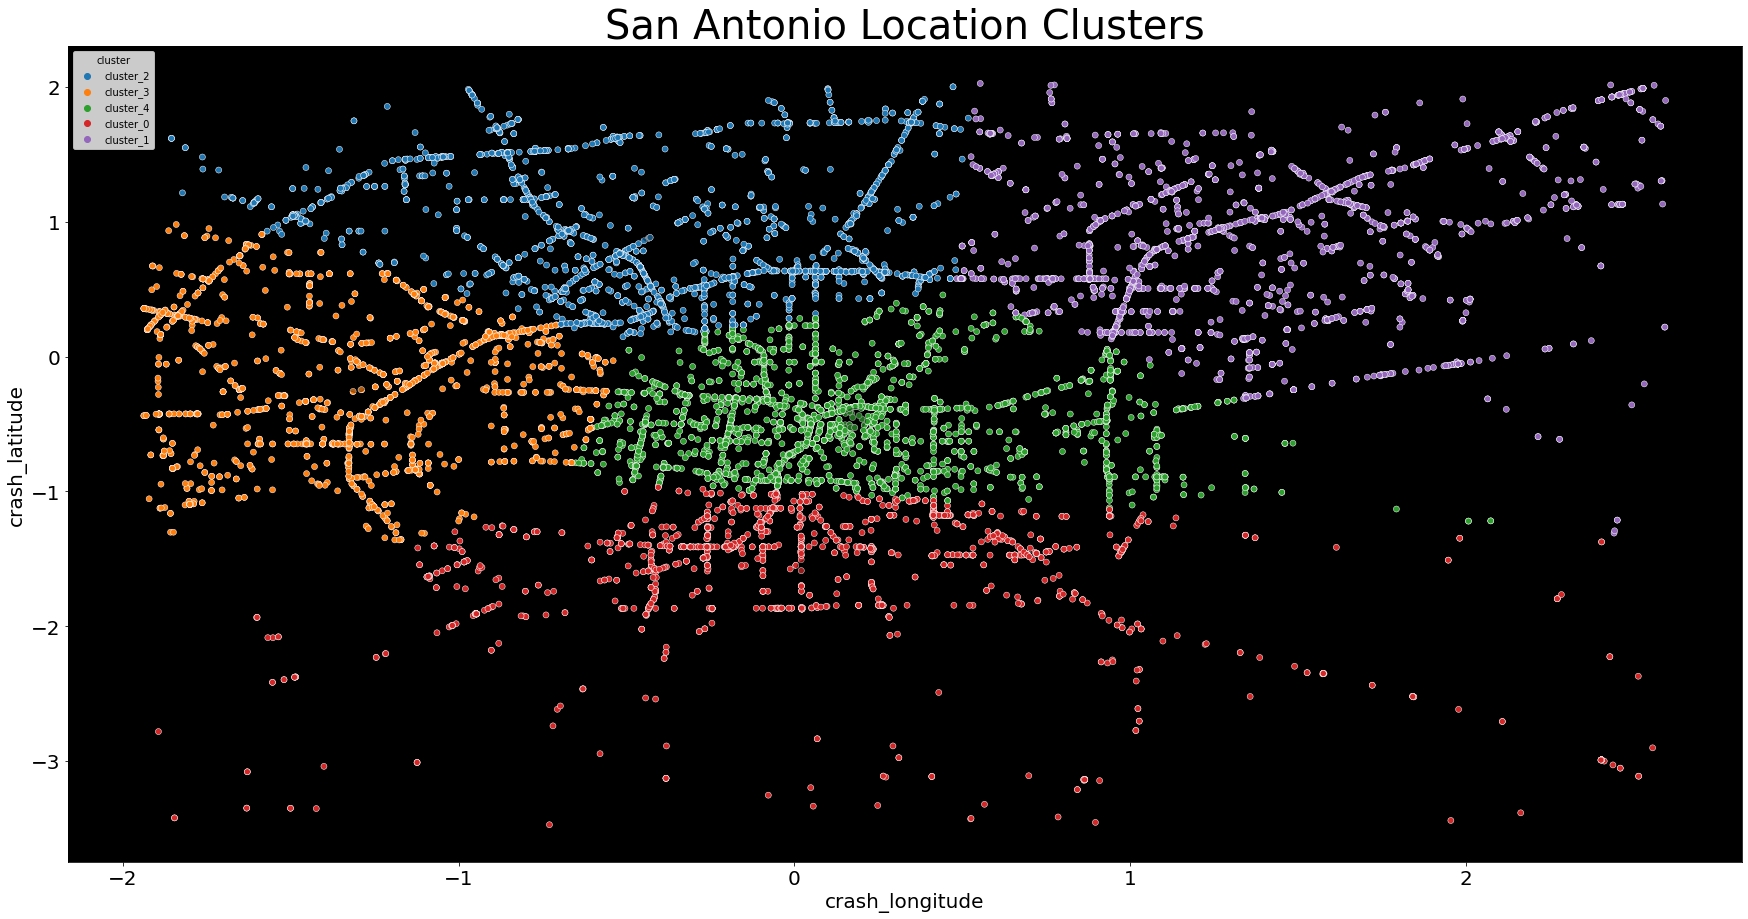

In [58]:

X = train_scaled[['crash_longitude', 'crash_latitude']]
train_scaled, kmeans, centroids = create_cluster(train_scaled, X, 5)
create_scatter_plot('crash_longitude','crash_latitude',train_scaled,kmeans, X)
plt.title('San Antonio Location Clusters', size = 40)
print('Clusters based on longitude and latitude')

In [46]:
#add location clusters under cluster
train['cluster'] = kmeans.predict(X)

In [47]:
#get the injury classes with respect to the location
cluster0 = train[train.cluster == 0].injury_class
cluster1 = train[train.cluster == 1].injury_class
cluster2 = train[train.cluster == 2].injury_class 
cluster3 = train[train.cluster == 3].injury_class 
cluster4 = train[train.cluster == 4].injury_class

In [48]:
#anova to see if injury classes proportions differ between the locations
f, p = f_oneway(cluster0,cluster1,cluster2,cluster3, cluster4)
f,p

(1.5828498439254126, 0.17581273907122658)

Text(0.5, 1.0, 'Features Correlated Casualties in SA Crashes')

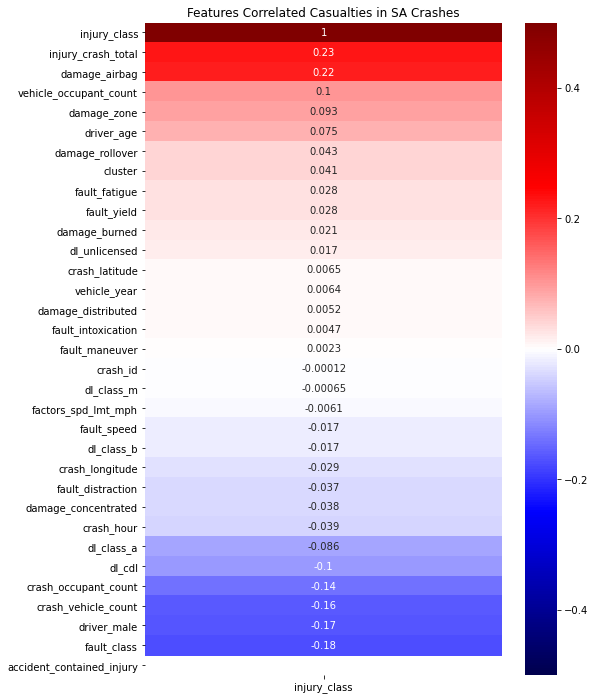

In [49]:
#heatmap
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(train[train.injury_crash_total>0].corr()[['injury_class']].sort_values(by='injury_class', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='seismic')
heatmap.set_title('Features Correlated Casualties in SA Crashes')

In [50]:
#rename the cluster groups to their respective location names
train["cluster"].replace({0: "West", 1: "Northeast", 2: "South", 3: "Central", 4:"North"}, inplace=True)

In [51]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time', 'crash_hour',
       'crash_day_of_week', 'accident_contained_injury', 'cluster'],
      dtype='object')

In [52]:
#proportion of injury means
train.groupby('cluster').injury_class.mean()

cluster
Central      0.172450
North        0.176825
Northeast    0.163729
South        0.187053
West         0.189571
Name: injury_class, dtype: float64

In [53]:
train.groupby(['cluster','fault_class']).injury_class.mean()

cluster    fault_class
Central    0              0.193970
           1              0.148842
North      0              0.201012
           1              0.150588
Northeast  0              0.177578
           1              0.148895
South      0              0.201145
           1              0.169492
West       0              0.227804
           1              0.147287
Name: injury_class, dtype: float64

In [54]:
crash_hour_by_location = train.groupby(['cluster','crash_hour']).injury_class.mean()
print(crash_hour_by_location.to_string())

cluster    crash_hour
Central    0             0.142857
           1             0.150000
           2             0.129032
           3             0.357143
           4             0.260870
           5             0.153846
           6             0.166667
           7             0.164179
           8             0.148148
           9             0.069767
           10            0.185185
           11            0.193548
           12            0.182796
           13            0.141732
           14            0.213333
           15            0.150538
           16            0.170543
           17            0.157895
           18            0.225564
           19            0.136364
           20            0.153061
           21            0.204545
           22            0.136364
           23            0.229508
North      0             0.230769
           1             0.128205
           2             0.200000
           3             0.250000
           4             0

In [55]:
train.groupby(['cluster','crash_hour']).injury_class.mean()

cluster  crash_hour
Central  0             0.142857
         1             0.150000
         2             0.129032
         3             0.357143
         4             0.260870
                         ...   
West     19            0.206349
         20            0.239130
         21            0.235294
         22            0.166667
         23            0.222222
Name: injury_class, Length: 120, dtype: float64

In [56]:
#thanks Robert!
print(train.groupby(['cluster', 'factors_road']).injury_class.value_counts(normalize = True).to_string())

cluster    factors_road           injury_class
Central    center stripe/divider  0               0.888889
                                  1               0.111111
           flashing light         0               1.000000
           marked lanes           0               0.799710
                                  1               0.200290
           none                   0               0.867647
                                  1               0.132353
           other                  0               0.916667
                                  1               0.083333
           signal light           0               0.807771
                                  1               0.192229
           stop sign              0               0.864130
                                  1               0.135870
           yield sign             0               0.790698
                                  1               0.209302
North      center stripe/divider  0               0.761364
         

In [57]:
print(train.groupby(['cluster', 'crash_hour']).injury_class.value_counts(normalize = True).to_string())

cluster    crash_hour  injury_class
Central    0           0               0.857143
                       1               0.142857
           1           0               0.850000
                       1               0.150000
           2           0               0.870968
                       1               0.129032
           3           0               0.642857
                       1               0.357143
           4           0               0.739130
                       1               0.260870
           5           0               0.846154
                       1               0.153846
           6           0               0.833333
                       1               0.166667
           7           0               0.835821
                       1               0.164179
           8           0               0.851852
                       1               0.148148
           9           0               0.930233
                       1               0.069767
    

In [58]:
print(train.groupby(['cluster', 'fault_intoxication']).injury_class.value_counts(normalize = True).to_string())

cluster    fault_intoxication  injury_class
Central    0                   0               0.828804
                               1               0.171196
           1                   0               0.790323
                               1               0.209677
North      0                   0               0.827358
                               1               0.172642
           1                   0               0.706522
                               1               0.293478
Northeast  0                   0               0.836346
                               1               0.163654
           1                   0               0.833333
                               1               0.166667
South      0                   0               0.812938
                               1               0.187062
           1                   0               0.813187
                               1               0.186813
West       0                   0               0.808917
    

In [59]:
print(train.groupby(['fault_intoxication','cluster']).injury_class.value_counts(normalize = True).to_string())

fault_intoxication  cluster    injury_class
0                   Central    0               0.828804
                               1               0.171196
                    North      0               0.827358
                               1               0.172642
                    Northeast  0               0.836346
                               1               0.163654
                    South      0               0.812938
                               1               0.187062
                    West       0               0.808917
                               1               0.191083
1                   Central    0               0.790323
                               1               0.209677
                    North      0               0.706522
                               1               0.293478
                    Northeast  0               0.833333
                               1               0.166667
                    South      0               0.813187
    

In [60]:
print(train.groupby(['factors_spd_lmt_mph','cluster']).injury_class.value_counts(normalize = True).to_string())

factors_spd_lmt_mph  cluster    injury_class
-1                   Central    0               0.916667
                                1               0.083333
                     North      0               0.890244
                                1               0.109756
                     Northeast  0               0.868421
                                1               0.131579
                     South      0               0.803922
                                1               0.196078
                     West       0               0.896552
                                1               0.103448
 5                   Central    0               1.000000
                     North      0               1.000000
                     Northeast  0               1.000000
                     West       0               0.750000
                                1               0.250000
 10                  Central    0               1.000000
                     North      0          

In [61]:
print(train.groupby(['fault_distraction','cluster']).injury_class.value_counts(normalize = True).to_string())

fault_distraction  cluster    injury_class
0                  Central    0               0.819365
                              1               0.180635
                   North      0               0.823418
                              1               0.176582
                   Northeast  0               0.842847
                              1               0.157153
                   South      0               0.808195
                              1               0.191805
                   West       0               0.805474
                              1               0.194526
1                  Central    0               0.842496
                              1               0.157504
                   North      0               0.822820
                              1               0.177180
                   Northeast  0               0.825279
                              1               0.174721
                   South      0               0.822542
                      

In [62]:
print(train.groupby(['factors_spd_lmt_mph','fault_distraction','cluster']).injury_class.value_counts(normalize = True).to_string())

factors_spd_lmt_mph  fault_distraction  cluster    injury_class
-1                   0                  Central    0               0.866667
                                                   1               0.133333
                                        North      0               0.885246
                                                   1               0.114754
                                        Northeast  0               0.878788
                                                   1               0.121212
                                        South      0               0.857143
                                                   1               0.142857
                                        West       0               0.898305
                                                   1               0.101695
                     1                  Central    0               1.000000
                                        North      0               0.904762
                        

In [63]:
print(train.groupby(['factors_spd_lmt_mph','fault_intoxication','cluster']).injury_class.value_counts(normalize = True).to_string())

factors_spd_lmt_mph  fault_intoxication  cluster    injury_class
-1                   0                   Central    0               0.913043
                                                    1               0.086957
                                         North      0               0.887500
                                                    1               0.112500
                                         Northeast  0               0.864865
                                                    1               0.135135
                                         South      0               0.795918
                                                    1               0.204082
                                         West       0               0.894118
                                                    1               0.105882
                     1                   Central    0               1.000000
                                         North      0               1.000000
           

In [64]:
from kmodes.kmodes import KModes

In [65]:
df.dropna(inplace=True)

In [66]:
train.dropna(inplace=True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 15150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 15150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 15150.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 348, cost: 12564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1070, cost: 12095.0
Init: initializing centroids
Init: initializing clusters
Starting iter

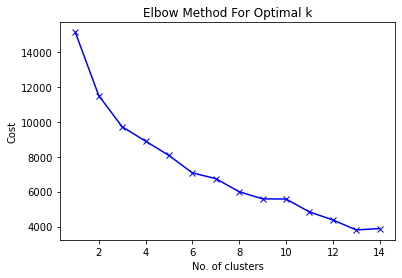

In [67]:
cost = []
K = range(1,15)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(train[['cluster','factors_road']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [68]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time', 'crash_hour',
       'crash_day_of_week', 'accident_contained_injury', 'cluster'],
      dtype='object')

In [69]:
kmode = KModes(n_clusters=6, init = "random", n_init = 5, verbose=1, random_state= 19)
clusters = kmode.fit_predict(train[['cluster', 'factors_road']])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1464, cost: 7151.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1047, cost: 7052.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1844, cost: 7723.0
Run 3, iteration: 2/100, moves: 16, cost: 7723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3412, cost: 7159.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1324, cost: 7504.0
Run 5, iteration: 2/100, moves: 233, cost: 7504.0
Best run was number 2


array([3, 0, 3, ..., 3, 1, 0], dtype=uint16)

In [70]:
clusters

array([3, 0, 3, ..., 3, 1, 0], dtype=uint16)

In [71]:
train['location_factor_roads'] = clusters

In [72]:
train

,crash_date,crash_id,crash_latitude,crash_longitude,crash_occupant_count,crash_vehicle_count,damage_airbag,damage_burned,damage_concentrated,damage_distributed,...,vehicle_make,vehicle_occupant_count,vehicle_type,vehicle_year,crash_time,crash_hour,crash_day_of_week,accident_contained_injury,cluster,location_factor_roads
15555,2021-05-04 04:31:00,18243165,29.489404,-98.569362,2,2,1,0,0,0,...,ford,1,mpv,2010,04:31:00,4,Tuesday,1,South,3
3400,2021-02-27 19:14:00,18127113,29.466576,-98.646928,2,2,1,0,0,1,...,other,1,mpv,2007,19:14:00,19,Saturday,1,Central,0
369,2021-03-15 13:38:00,18150264,29.503695,-98.574382,2,2,1,0,0,0,...,toyota,1,mpv,2017,13:38:00,13,Monday,1,South,3
16947,2021-04-28 13:20:00,18258240,29.516970,-98.491711,2,2,0,0,0,0,...,ford,1,mpv,2010,13:20:00,13,Wednesday,1,South,3
13757,2021-05-11 08:04:00,18250485,29.473068,-98.405359,2,2,1,0,0,1,...,ford,1,mpv,2008,08:04:00,8,Tuesday,0,North,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7092,2021-04-08 18:30:00,18193236,29.520381,-98.460967,4,2,1,0,0,0,...,chevrolet,2,car,2021,18:30:00,18,Thursday,1,South,3
3684,2021-02-26 14:34:00,18141106,29.482450,-98.599670,3,3,0,0,0,1,...,toyota,1,mpv,2017,14:34:00,14,Friday,0,Central,2
722,2021-03-13 11:50:00,18148551,29.517639,-98.466878,3,2,1,0,0,1,...,chevrolet,1,mpv,2019,11:50:00,11,Saturday,0,South,3
3838,2021-02-25 16:19:00,18125183,29.388113,-98.512016,4,3,0,0,0,0,...,mazda,1,mpv,2011,16:19:00,16,Thursday,0,West,1


In [73]:
observed = pd.crosstab(train.injury_class, train.location_factor_roads)
observed

location_factor_roads,0,1,2,3,4,5
injury_class,,,,,,
0,3545,1604,1371,1244,740,429
1,677,400,317,266,161,110


In [74]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.0018839346846564332

In [75]:
observed = pd.crosstab(train.injury_class, train.location_factor_roads)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
location_factor_roads     0     1     2     3    4    5
injury_class                                           
0                      3545  1604  1371  1244  740  429
1                       677   400   317   266  161  110
---
Expected
[[3471.56903535 1647.80301915 1387.96980854 1241.60806333  740.85355302
   443.19652062]
 [ 750.43096465  356.19698085  300.03019146  268.39193667  160.14644698
    95.80347938]]
---

chi^2 = 19.0468
p     = 0.0019


### Here

In [76]:
def chi2(feature, target):
    observed = pd.crosstab(feature, target, margins = True)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p > 0.05:
        return print(f'Fail to reject the null hypothesis, p value is {p}')
    else:
        print(f'Reject the null hypothesis, p value is {p}')

In [77]:
chi2(train.cluster, train.injury_class)

Fail to reject the null hypothesis, p value is 0.7867630409501585


### Damage Zone and Speed Limit

We wanted to see if speed limit of the road has an affect where cars end up getting damaged in an accident. 
SIGNIFICANT

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 14016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14016.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1774, cost: 11454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 296, cost: 11828.0
Init: initializing centroids
Init: initializing clusters
Starting iter

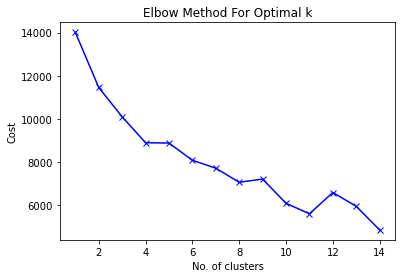

In [78]:
cost = []
K = range(1,15)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
    kmode.fit_predict(train[['damage_zone','factors_spd_lmt_mph']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [79]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=0, random_state= 19)
clusters = kmode.fit_predict(train[['damage_zone', 'factors_spd_lmt_mph']])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3124, cost: 8669.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1289, cost: 9957.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3134, cost: 9113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1343, cost: 10052.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 366, cost: 9453.0
Best run was number 1


array([2, 3, 1, ..., 0, 0, 0], dtype=uint16)

In [80]:
train['speed_damage_cluster'] = clusters

In [81]:
observed = pd.crosstab(train.injury_class, train.speed_damage_cluster)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.1g}')

Observed
speed_damage_cluster     0     1     2     3
injury_class                                
0                     4888  1581  1369  1095
1                      982   351   332   266
---
Expected
[[4826.64856406 1588.60051546 1398.65914948 1119.09177099]
 [1043.35143594  343.39948454  302.34085052  241.90822901]]
---

chi^2 = 11.0484
p     = 0.01


In [82]:
train.columns

Index(['crash_date', 'crash_id', 'crash_latitude', 'crash_longitude',
       'crash_occupant_count', 'crash_vehicle_count', 'damage_airbag',
       'damage_burned', 'damage_concentrated', 'damage_distributed',
       'damage_rollover', 'damage_zone', 'dl_cdl', 'dl_class_a', 'dl_class_b',
       'dl_class_m', 'dl_state', 'dl_unlicensed', 'driver_age', 'driver_male',
       'driver_race', 'factors_road', 'factors_spd_lmt_mph', 'factors_weather',
       'fault_class', 'fault_distraction', 'fault_fatigue',
       'fault_intoxication', 'fault_maneuver', 'fault_narrative',
       'fault_speed', 'fault_yield', 'injury_class', 'injury_crash_total',
       'vehicle_color', 'vehicle_id', 'vehicle_make', 'vehicle_occupant_count',
       'vehicle_type', 'vehicle_year', 'crash_time', 'crash_hour',
       'crash_day_of_week', 'accident_contained_injury', 'cluster',
       'location_factor_roads', 'speed_damage_cluster'],
      dtype='object')

### Vehicle type, damage zone, and speed limit

We wanted to see if the type of vehicle, where it was damaged, and what the speed limit of the road was could contribute to if someone was injured or not. 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 19981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 19981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 19981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 19981.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 19981.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 276, cost: 19026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 214, cost: 18600.0
Init: initializing centroids
Init: initializing clusters
Starting itera

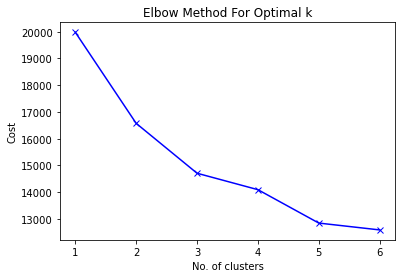

In [83]:
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
    kmode.fit_predict(train[['vehicle_type','damage_zone','factors_spd_lmt_mph']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [84]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=0, random_state= 19)
clusters = kmode.fit_predict(train[['vehicle_type', 'factors_spd_lmt_mph','damage_zone']])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2585, cost: 14232.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4089, cost: 13647.0
Run 2, iteration: 2/100, moves: 339, cost: 13647.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1854, cost: 13336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2471, cost: 13949.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1916, cost: 14819.0
Best run was number 3


array([1, 3, 2, ..., 3, 3, 3], dtype=uint16)

In [85]:
train['vehicle_type_damage_speed_cluster'] = clusters

In [86]:
observed = pd.crosstab(train.injury_class, train.vehicle_type_damage_speed_cluster)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.1g}')

Observed
vehicle_type_damage_speed_cluster     0     1     2     3
injury_class                                             
0                                  2941  2266  1975  1751
1                                   500   586   447   398
---
Expected
[[2829.3863218  2345.0769514  1991.5064433  1767.03028351]
 [ 611.6136782   506.9230486   430.4935567   381.96971649]]
---

chi^2 = 41.3613
p     = 5e-09


### Speeding and Failure to Yield

We want to see if accidents caused by speeding and failure to yield would contribute to whether there will be an injury or not.

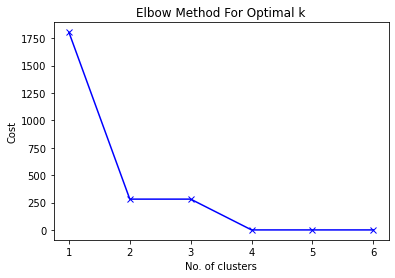

In [87]:
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
    kmode.fit_predict(train[['fault_speed','fault_yield']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [88]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1, random_state= 19)
clusters = kmode.fit_predict(train[['fault_speed', 'fault_yield']])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


array([0, 3, 3, ..., 3, 0, 3], dtype=uint16)

In [89]:
train['speed_no_yield_cluster'] = clusters

In [90]:
observed = pd.crosstab(train.injury_class, train.speed_no_yield_cluster)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.1g}')

Observed
speed_no_yield_cluster     0    1   2     3
injury_class                               
0                       1194  187  25  7527
1                        294   59  10  1568
---
Expected
[[1.22351841e+03 2.02275221e+02 2.87789948e+01 7.47842737e+03]
 [2.64481591e+02 4.37247791e+01 6.22100515e+00 1.61657263e+03]]
---

chi^2 = 15.0633
p     = 0.002


Text(0.5, 1.0, 'Features Correlated Casualties in SA Crashes')

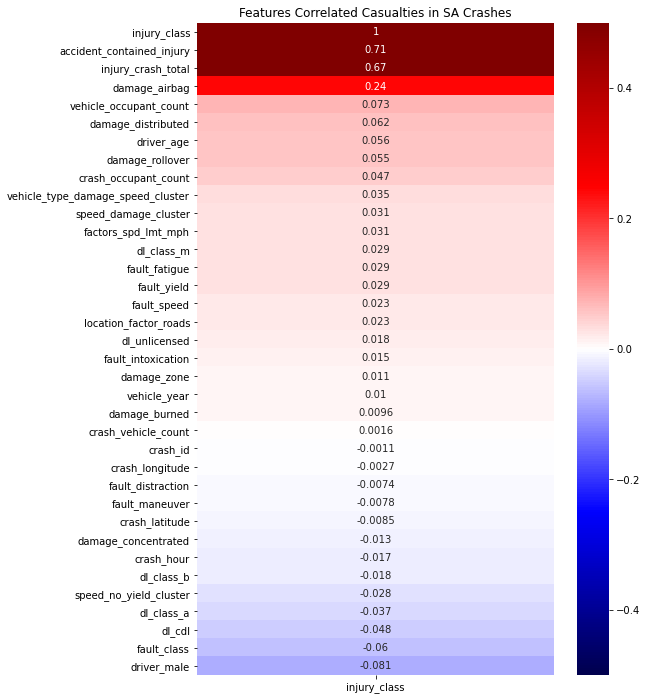

In [91]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(train.corr()[['injury_class']].sort_values(by='injury_class', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='seismic')
heatmap.set_title('Features Correlated Casualties in SA Crashes')

### Damage Zone and Airbags

We wanted to see if where the car was hit and if airbags deployed would affect if there was an injury in the accident. 

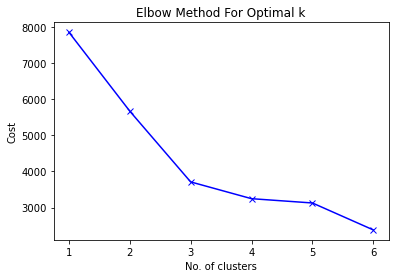

In [92]:
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
    kmode.fit_predict(train[['damage_zone','damage_airbag']])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [93]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=0, random_state= 19)
clusters = kmode.fit_predict(train[['damage_zone', 'damage_airbag']])
clusters

array([3, 3, 1, ..., 3, 0, 0], dtype=uint16)

In [94]:
train['damage_zone_airbag'] = clusters

In [95]:
observed = pd.crosstab(train.injury_class, train.damage_zone_airbag)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.1g}')

Observed
damage_zone_airbag     0    1     2     3
injury_class                             
0                   5729  279  1712  1213
1                    703   43   476   709
---
Expected
[[5288.75699558  264.76675258 1799.09830633 1580.37794551]
 [1143.24300442   57.23324742  388.90169367  341.62205449]]
---

chi^2 = 714.6813
p     = 1e-154


In [96]:
def elbow_kmode(train, var=[]):
    cost = []
    K = range(1,7)
    for num_clusters in list(K):
        kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
        kmode.fit_predict(train[var])
        cost.append(kmode.cost_)

    plt.plot(K, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    plt.show()

### Speeding and Speed Limit

We wanted to see if speeding and the assigned speed limit contributed to an injury in an accident. 

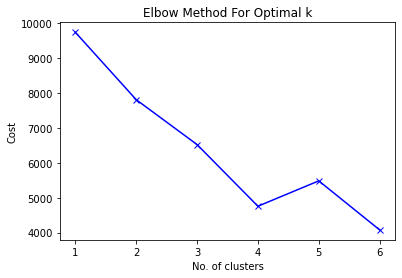

In [97]:
elbow_kmode(train, var=['fault_speed','factors_spd_lmt_mph'])

In [98]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=0, random_state= 19)
clusters = kmode.fit_predict(train[['fault_speed', 'factors_spd_lmt_mph']])
clusters

array([3, 2, 1, ..., 0, 3, 0], dtype=uint16)

In [99]:
train['speedy_cluster'] = clusters
observed = pd.crosstab(train.injury_class, train.speedy_cluster)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.1g}')

Observed
speedy_cluster     0     1     2    3
injury_class                         
0               5444  1581  1330  578
1               1107   351   338  135
---
Expected
[[5386.60557806 1588.60051546 1371.52466863  586.26923785]
 [1164.39442194  343.39948454  296.47533137  126.73076215]]
---

chi^2 = 11.3746
p     = 0.01


### Vehicle Type and Injury Class

Just testing to see if vehicle type affects injury

In [100]:
observed = pd.crosstab(train.injury_class, train.vehicle_type)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.1g}')

Observed
vehicle_type  bus   car  motorcycle   mpv  non-passenger  truck
injury_class                                                   
0              66  3938          26  2694            208   2001
1               8   961          50   619             21    272
---
Expected
[[  60.84701767 4028.23702135   62.49153166 2724.13742636  188.29685199
  1868.99015096]
 [  13.15298233  870.76297865   13.50846834  588.86257364   40.70314801
   404.00984904]]
---

chi^2 = 199.6478
p     = 3e-41


### Vehicle Type and Air Bags

Does vehicle type and if air bags get deployed in an accident affect injury?

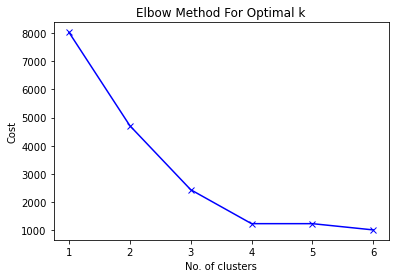

In [101]:
elbow_kmode(train, var=['vehicle_type','damage_airbag'])

In [102]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1, random_state= 19)
clusters = kmode.fit_predict(train[['vehicle_type', 'damage_airbag']])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2652.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 605, cost: 1838.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3027.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3953.0
Best run was number 3


array([2, 2, 2, ..., 2, 3, 3], dtype=uint16)

In [103]:
train['vehicle_type_airbag'] = clusters
observed = pd.crosstab(train.vehicle_type_airbag, train.injury_class)
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.1g}')

Observed
injury_class            0    1
vehicle_type_airbag           
0                    2296  348
1                    3938  961
2                     373  232
3                    2326  390
---
Expected
[[2174.04749632  469.95250368]
 [4028.23702135  870.76297865]
 [ 497.46548233  107.53451767]
 [2233.25        482.75      ]]
---

chi^2 = 246.7355
p     = 3e-53


In [104]:
def elbow_kmode(train, var=[]):
    cost = []
    K = range(1,7)
    for num_clusters in list(K):
        kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
        kmode.fit_predict(train[var])
        cost.append(kmode.cost_)

    plt.plot(K, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    plt.show()

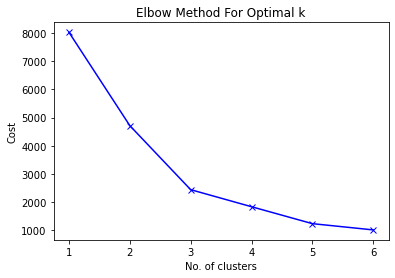

In [105]:
elbow_kmode(train, var=['vehicle_type','damage_airbag'])

In [106]:
def chi2(feature, target):
    observed = pd.crosstab(feature, target, margins = True)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p > 0.05:
        return print(f'Fail to reject the null hypothesis, p value is {p}')
    else:
        print(f'Reject the null hypothesis, p value is {p}')

In [107]:
chi2(train.vehicle_type_airbag, train.injury_class)

Reject the null hypothesis, p value is 8.47482947515609e-49


### Occupants, Speed Limit and Weather

In [108]:
#make sure for the final to append the cluster predictions on the test

In [109]:
elbow_kmode(train, var=['vehicle_occupant_count','factors_spd_lmt_mph','factors_weather'])

KeyboardInterrupt: 

In [110]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=0, random_state= 19)
clusters = kmode.fit_predict(train[['vehicle_occupant_count','factors_spd_lmt_mph','factors_weather']])
clusters

array([0, 3, 1, ..., 0, 2, 0], dtype=uint16)

In [111]:
train['vehicle_type_speed_lmt_weather'] = clusters

In [112]:
chi2(train.vehicle_type_speed_lmt_weather, train.injury_class)

Fail to reject the null hypothesis, p value is 0.4506071595958312


### Weather + Location + Dmg Zone

We wanted to see if weather, location, and damage zone affected if an injury was reported. But it was not significant.

In [ ]:
def elbow_kmode_extra(train, var=[]):
    cost = []
    K = range(1,20)
    for num_clusters in list(K):
        kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0)
        kmode.fit_predict(train[var])
        cost.append(kmode.cost_)

    plt.plot(K, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [ ]:
elbow_kmode_extra(train, var=['damage_zone','cluster','factors_weather'])

In [113]:
kmode = KModes(n_clusters=11, init = "random", n_init = 5, verbose=0, random_state= 19)
clusters = kmode.fit_predict(train[['damage_zone','cluster','factors_weather']])
clusters

array([ 4,  2,  4, ...,  0,  0, 10], dtype=uint16)

In [114]:
train['location_damage_weather'] = clusters

In [115]:
chi2(train.location_damage_weather, train.injury_class)

Fail to reject the null hypothesis, p value is 0.1547409581605552


### Location and Weather

we wanted to see if location and weather affected if an injury was reported.

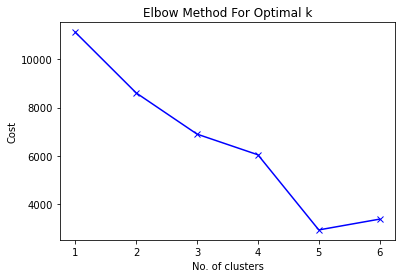

In [116]:
elbow_kmode(train, var=['cluster','factors_weather'])

In [117]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=0, random_state= 19)
clusters = kmode.fit_predict(train[['cluster','factors_weather']])
clusters

array([3, 0, 3, ..., 3, 1, 2], dtype=uint16)

In [118]:
train['location_weather'] = clusters

In [119]:
chi2(train.location_weather, train.injury_class)

Fail to reject the null hypothesis, p value is 0.6690909659918127


### Condensing

In [ ]:
elbow_kmode(train, var=['damage_zone','cluster','factors_weather'])

In [ ]:
def create_kmode_clusters(train, n, var=[]):
    kmode = KModes(n_clusters=n, init = "random", n_init = 5, verbose=0, random_state= 19)
    clusters = kmode.fit_predict(train[var])
    return clusters

In [ ]:
create_kmode_clusters(train, 11, var=['damage_zone','cluster','factors_weather'])

----

### Test Explore File Here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.cluster import KMeans

import prepare as p
import anna_prep as ap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from scipy.stats import f_oneway
from scipy import stats
from kmodes.kmodes import KModes

In [ ]:
# df = ap.anna_prep()
# df = df.dropna()

In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['vehicle_type_num'] = labelencoder.fit_transform(df['vehicle_type'])
df

In [ ]:
# Assigning numerical values and storing in another column
df['week_num'] = labelencoder.fit_transform(df['crash_day_of_week'])
df

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=19, stratify=df.injury_class)

In [ ]:
X_train, y_train, X_test, y_test = ap.split_X_y(train, test, 'injury_class')

In [ ]:
train_scaled, test_scaled = ap.scale_data(train, test, scale_type = 'Standard', to_scale = ['crash_longitude','crash_latitude'])

In [ ]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled = ap.split_X_y(train_scaled, test_scaled, 'injury_class')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# labelencoder = LabelEncoder()
# # Assigning numerical values and storing in another column
# train['vehicle_type_num'] = labelencoder.fit_transform(train['vehicle_type'])
# train

In [ ]:
train[['vehicle_type','vehicle_type_num']].value_counts()

In [ ]:
train.vehicle_type_num

In [ ]:
train.factors_weather

In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train['weather_type_num'] = labelencoder.fit_transform(train['factors_weather'])
train

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [ ]:
def select_kbest(X,y,top):
    f_selector = SelectKBest(f_regression, top)
    f_selector.fit(X,y)
    result = f_selector.get_support()
    f_feature = X.loc[:,result].columns.tolist()
    return f_feature

def select_rfe(X, y, n, alg):
    alg = alg
    rfe = RFE(alg, n)
    X_rfe = rfe.fit_transform(X,y)
    mask = rfe.support_
    rfe_feautures = X.loc[:,mask].columns.tolist()
    return rfe_feautures

In [ ]:
alg = DecisionTreeClassifier()

In [ ]:
X_train_scaled

In [ ]:
def get_object_cols(df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # create a mask of columns whether they are object type or not
    mask = np.array(df.dtypes == "object")

        
    # get a list of the column names that are objects (from the mask)
    object_cols = df.iloc[:, mask].columns.tolist()
    
    return object_cols

def get_numeric_X_cols(X_train, object_cols):
    '''
    takes in a dataframe and list of object column names
    and returns a list of all other columns names, the non-objects. 
    '''
    numeric_cols = [col for col in X_train.columns.values if col not in object_cols]
    
    return numeric_cols

In [ ]:
obj_cols = get_object_cols(X_train_scaled)

In [ ]:
num_cols = get_numeric_X_cols(X_train_scaled, obj_cols)

In [ ]:
num_cols.remove('crash_date')

In [ ]:
alg = LogisticRegression()

In [ ]:
select_rfe(X_train_scaled[num_cols], y_train, 10, alg)

In [ ]:
alg = RandomForestClassifier(random_state=19)

In [ ]:
select_rfe(X_train_scaled[num_cols], y_train, 13, alg)

In [ ]:
#select_kbest(X,y,top)
select_kbest(X_train_scaled[num_cols],y_train,15)

In [ ]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_depth=5)

cross_val_score(tree, X_train[num_cols], y_train, cv=3)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# X = ['crash_occupant_count',
#  'damage_airbag',
#  'damage_distributed',
#  'damage_rollover',
#  'dl_cdl',
#  'dl_class_a',
#  'dl_class_b',
#  'factors_spd_lmt_mph',
#  'fault_class',
#  'fault_speed',
#  'vehicle_occupant_count',
#  ]

In [ ]:
num_cols

In [ ]:
train

In [ ]:
num_cols

In [ ]:
X = [#'crash_id',
 #'crash_latitude',
 #'crash_longitude',
 'crash_occupant_count',
 'crash_vehicle_count',
 'damage_airbag',
# 'damage_burned',
 'damage_concentrated',
 'damage_distributed',
 'damage_rollover',
 'damage_zone',
 'dl_cdl',
 #'dl_class_a',
 #'dl_class_b',
 #'dl_class_m',
 #'dl_unlicensed',
 #'driver_age',
 #'driver_male',
 'factors_spd_lmt_mph',
 'fault_class',
 'fault_distraction',
 'fault_fatigue',
 'fault_intoxication',
 'fault_maneuver',
 'fault_speed',
 'fault_yield',
 #'injury_crash_total',
 'vehicle_occupant_count',
 'vehicle_year',
 'crash_hour',
 'vehicle_type_num',
 'week_num']
 #'accident_contained_injury'

In [ ]:
params = {'max_depth': [2, 3, 4],
          'max_features': [None, 1, 3]}

tree = DecisionTreeClassifier()

grid = GridSearchCV(tree, params, cv=3)

grid.fit(X_train[X], y_train)

In [ ]:
results = grid.cv_results_
results.keys()

In [ ]:
test_scores = results['mean_test_score']
test_scores

In [ ]:
params = results['params']
params

In [ ]:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

In [ ]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(max_depth=4, max_features=3)

cross_val_score(tree, X_train[X], y_train, cv=3)

In [ ]:
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, params, cv=3)

grid.fit(X_train[X], y_train)

results = grid.cv_results_

test_scores = results['mean_test_score']

params = results['params']

for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

cross_val_score(knn, X_train[X], y_train, cv=3)

In [ ]:
params = {'C': [0.2, 0.5, 1, 1.2, 1.5, 2]}

logit = LogisticRegression()

grid = GridSearchCV(logit, params, cv=3)

grid.fit(X_train[X], y_train)

results = grid.cv_results_

test_scores = results['mean_test_score']

params = results['params']

for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

In [ ]:
logit = LogisticRegression(C=0.5)

cross_val_score(logit, X_train[X], y_train, cv=3)

In [ ]:
y_train.value_counts()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
train['baseline_prediction'] = 0

In [ ]:
baseline_score = round(accuracy_score(train.injury_class, train.baseline_prediction),5)
print(f'Our baseline score is {baseline_score}')